# 第3章 神经网络 

## 3.1 从感知机到神经网络 

神经网络包含输入层、中间层和输出层。中间层有时也称为隐藏层。

“朴素感知机”指单层网络，指的是激活函数使用了阶跃函数的模型；“多层感知机”是指神经网络，即使用了sigmoid函数等平滑的激活函数的多层网络。

## 3.2 激活函数 

- 阶跃函数

阶跃函数以阈值为界，一旦超过阈值，就切换输出

In [1]:
# 支持ndarray的阶跃函数的实现
import numpy as np
def step_function(x):
    y = x >0
    return y.astype(np.int)          #将布尔值数组转换为整数
x = np.array([-1.0,1.0,2.0])
step_function(x)


array([0, 1, 1])

In [2]:
y = x > 0
y

array([False,  True,  True])

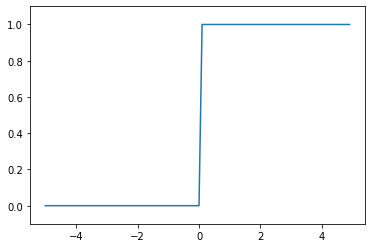

In [3]:
# 阶跃函数的图形
import matplotlib.pylab as plt

def step_funcion(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

- sigmoid函数

$ h(x)= \frac{1}{1+exp(-x)} $

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [5]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

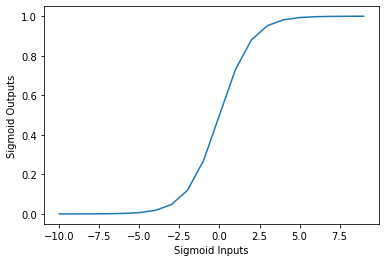

In [6]:
# 绘制sigmoid函数
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

sigmoid_inputs = np.arange(-10,10)
sigmoid_outputs = sigmoid(sigmoid_inputs)

plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
plt.show()

阶跃函数与sigmoid的函数的对比：

- sigmoid函数是一条平滑的曲线，阶跃函数以0为界发生急剧的变化
- 阶跃函数只能返回0或1，而sigmoid函数可以返回0和1之间的实数，感知机中流动的是0或1的二元信号，神经网络中流动的是连续的实值信号
- 两则当输入小时，输出接近0（为0） 随着输入增大，输出向1靠近 且输出信号的值都在0到1之间

神经网络的激活函数必须使用非线性函数，因为使用线性函数的话，加深神经网络的层数就没有意义了。

- ReLU函数

$
y=\left\{\begin{array}{ll}
x & \text{ $x > 0 $ } \\
0 & \text{ $x \le 0$ }
\end{array}\right.
$

In [7]:
def relu(x):
    return np.maximum(0,x)

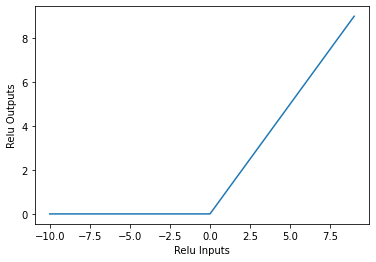

In [8]:
# ReLU函数图像
relu_inputs = np.arange(-10,10)
relu_outputs = relu(sigmoid_inputs)

plt.plot(relu_inputs,relu_outputs)
plt.xlabel("Relu Inputs")
plt.ylabel("Relu Outputs")
plt.show()

### 3.3 输出层函数——恒等函数和softmax函数 

一般而言，回归问题用恒等函数，分类问题用softmax函数

p.s. 回归问题 根据某个输入预测一个连续型数值

softmax函数：

$ y_k = \frac{exp(a_k)}{\sum\limits_{i=1}^n exp(a_i)}$

softmax函数的输出是0.0到1.0之间的实数 且输出总和为1

- softmax函数

In [9]:
import numpy as np

def softmax(x):
    orig_shape=x.shape
    if len(x.shape)>1:
        #Matrix
        #shift max whithin each row
        constant_shift=np.max(x,axis=1).reshape(1,-1)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x,axis=1).reshape(1,-1)
        x/=normlize
    else:
        #vector
        constant_shift=np.max(x)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x)
        x/=normlize
    assert x.shape==orig_shape
    return x

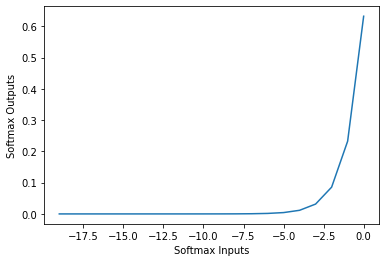

sum(output) =1.0


In [10]:
def softmax(x):
    orig_shape=x.shape
    if len(x.shape)>1:
        #Matrix
        #shift max whithin each row
        constant_shift=np.max(x,axis=1).reshape(1,-1)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x,axis=1).reshape(1,-1)
        x/=normlize
    else:
        #vector
        constant_shift=np.max(x)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x)
        x/=normlize
    assert x.shape==orig_shape
    return x

softmax_inputs = np.arange(-10,10)
softmax_outputs=softmax(softmax_inputs)

# 画图像
plt.plot(softmax_inputs,softmax_outputs)
plt.xlabel("Softmax Inputs")
plt.ylabel("Softmax Outputs")
plt.show()

print(f'sum(output) ={sum(softmax_outputs)}')

## 3.4 3层神经网络的计算 

In [11]:
# 第0层到第1层信号的传递
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) 
B1 = np.array([0.1,0.2,0.3])
A1 = np.dot(X,W1) + B1
A1

array([0.3, 0.7, 1.1])

In [12]:
Z1 = sigmoid(A1)
Z1
# 隐藏层的加权和用A表示，别激活函数转换后的信号用z表示 

array([0.57444252, 0.66818777, 0.75026011])

In [13]:
# 第1层到第2层的信号传递
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
A2

array([0.51615984, 1.21402696])

In [14]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [15]:
# 从第2层到输出层的信号传递
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
A3

array([0.31682708, 0.69627909])

In [16]:
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

输出层所用的激活函数，回归问题可以用恒等函数 二元分类问题可以用sigmoid函数 多元分类问题可以用softmax函数

In [17]:
# 代码实现小结
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) +b3
    y = identity_function(a3)
    return y 

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


In [18]:
network = init_network()
x = np.array([0.5,10])
y = forward(network,x)
print(y)

[0.33432709 0.73517497]


## 3.5输出层的设计 

一般而言，回归问题用恒等函数，分类问题用softmax函数

p.s. 回归问题 根据某个输入预测一个连续型数值

softmax函数：

$ y_k = \frac{exp(a_{k})}{\sum\limits_{i=1}^n exp(a_i)}$

softmax函数的输出是0.0到1.0之间的实数 且输出总和为1

In [19]:
# softmax函数的实现
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
softmax([0.3,2.9,4.0])

array([0.01821127, 0.24519181, 0.73659691])

softmax函数可能会出现“溢出”问题 计算机处理的数必须在4字节或8字节的有限数据宽度内

In [20]:
a = np.array([1010,1000,990])
np.exp(a)/np.sum(np.exp(a))

e:\software\miniconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
e:\software\miniconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [21]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)              #溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
softmax([1010,1000,990])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果

## 3.6手写数字识别 

In [22]:
%run mnist.py

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [23]:
# %load mnist.py
#!/usr/bin/env python

# In[2]:


# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('__file__'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()



Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [24]:
# %load D:\datasets\Deep learning from scratch\【源代码】深度学习入门：基于Python的理论与实现\ch03\mnist_show.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()                            #将保存为ndarray的图像数据转换为PIL用的数据对象

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)              

5
(784,)
(28, 28)


对MNIST数据集实现神经网络的前推处理

In [25]:
# %load D:\datasets\Deep learning from scratch\【源代码】深度学习入门：基于Python的理论与实现\ch03\neuralnet_mnist.py
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from mnist import load_mnist
#from common.functions import sigmoid, softmax    报错，再写
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)              #溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network                          #init_network会读入保存在pickle文件sample_weight.pkl中学习到的权重参数


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [26]:
x, _ = get_data()
network = init_network()
W1,W2,W3 = network['W1'], network['W2'], network['W3']
x.shape

(10000, 784)

In [27]:
x[0].shape

(784,)

In [28]:
W1.shape

(784, 50)

In [29]:
W2.shape

(50, 100)

In [30]:
W3.shape

(100, 10)

输入一个由784个元素（原本是一个28*28的二维数组）构成的一维数组之后，输出一个有10个元素的一维数组 这是一张图像数据时的处理流程

考虑输入多张图片的情形，比如一次性打包处理100张图像，可以将输入x的形状变为100*784，将100张图像打包作为输入数据。

这种打包式输入数据称为批

In [31]:
# 批处理的代码实现
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]             #x[0:100] x[100:200]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352
